<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データ考察" data-toc-modified-id="データ考察-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データ考察</a></span></li><li><span><a href="#タクシーIDでグルーピング" data-toc-modified-id="タクシーIDでグルーピング-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>タクシーIDでグルーピング</a></span><ul class="toc-item"><li><span><a href="#タクシーID毎に乗車数をカウント" data-toc-modified-id="タクシーID毎に乗車数をカウント-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>タクシーID毎に乗車数をカウント</a></span></li><li><span><a href="#乗車時間が長いドライバーでソート" data-toc-modified-id="乗車時間が長いドライバーでソート-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>乗車時間が長いドライバーでソート</a></span></li><li><span><a href="#優良ドライバー候補の抽出" data-toc-modified-id="優良ドライバー候補の抽出-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>優良ドライバー候補の抽出</a></span></li></ul></li><li><span><a href="#TAXI_ID-=-20000904-（乗車時間が最も長い）で考察" data-toc-modified-id="TAXI_ID-=-20000904-（乗車時間が最も長い）で考察-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TAXI_ID = 20000904 （乗車時間が最も長い）で考察</a></span><ul class="toc-item"><li><span><a href="#乗車地点" data-toc-modified-id="乗車地点-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>乗車地点</a></span></li><li><span><a href="#降車地点" data-toc-modified-id="降車地点-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>降車地点</a></span></li></ul></li><li><span><a href="#TAXI_ID-=-20000904-（乗車回数が最も多い）で考察" data-toc-modified-id="TAXI_ID-=-20000904-（乗車回数が最も多い）で考察-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TAXI_ID = 20000904 （乗車回数が最も多い）で考察</a></span><ul class="toc-item"><li><span><a href="#乗車地点" data-toc-modified-id="乗車地点-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>乗車地点</a></span></li></ul></li><li><span><a href="#TAXI_ID-=-20000521-（新人）で考察" data-toc-modified-id="TAXI_ID-=-20000521-（新人）で考察-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>TAXI_ID = 20000521 （新人）で考察</a></span></li><li><span><a href="#TAXI_ID-=-20000440-（中堅）で考察" data-toc-modified-id="TAXI_ID-=-20000440-（中堅）で考察-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>TAXI_ID = 20000440 （中堅）で考察</a></span></li><li><span><a href="#TAXI_ID-=-20000380-(中堅）で考察" data-toc-modified-id="TAXI_ID-=-20000380-(中堅）で考察-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TAXI_ID = 20000380 (中堅）で考察</a></span></li><li><span><a href="#分析方針" data-toc-modified-id="分析方針-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>分析方針</a></span></li><li><span><a href="#乗車率の算出" data-toc-modified-id="乗車率の算出-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>乗車率の算出</a></span><ul class="toc-item"><li><span><a href="#乗車率の定義" data-toc-modified-id="乗車率の定義-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>乗車率の定義</a></span></li></ul></li></ul></div>

## データ考察

In [ ]:
# Google Map上にプロットするライブラリ
# !pip install gmplot

In [1]:
import pandas as pd 
import numpy as np
import re
import copy
from datetime import datetime as dt
from gmplot import gmplot

from matplotlib import pyplot as plt
import seaborn as sns

# warningの抑止
import warnings
warnings.filterwarnings('ignore')

# メモリ解放
import gc

In [4]:
pd.set_option("display.max_columns", 30)

# データを読み込む
df = pd.read_csv("data/edit_train.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

df.head()

,TIMESTAMP,year,month,day,weekday,hour,minute,second,TAXI_ID,TRIP_ID,holiday,riding_time,start_x,start_y,end_x,end_y,DAY_TYPE,CALL_TYPE,ORIGIN_STAND,ORIGIN_CALL,MISSING_DATA
0,1372636853,2013,7,1,mon,0,0,53,20000380,1372636853620000380,o,375,-8.610291,41.140746,-8.605890,41.145345,A,C,NaN,NaN,False
1,1372636854,2013,7,1,mon,0,0,54,20000520,1372636854620000520,o,645,-8.574678,41.151951,-8.607996,41.142915,A,C,NaN,NaN,False
2,1372636858,2013,7,1,mon,0,0,58,20000589,1372636858620000589,o,345,-8.618643,41.141412,-8.630838,41.154489,A,C,NaN,NaN,False
3,1372636875,2013,7,1,mon,0,1,15,20000233,1372636875620000233,o,330,-8.619894,41.148009,-8.609490,41.157351,A,C,NaN,NaN,False
4,1372636896,2013,7,1,mon,0,1,36,20000360,1372636896620000360,o,645,-8.617599,41.146137,-8.636625,41.169141,A,C,NaN,NaN,False


## タクシーIDでグルーピング

In [5]:
group_taxi_id = df.groupby("TAXI_ID")

### タクシーID毎に乗車数をカウント

In [6]:
driving_count = group_taxi_id.size().sort_values(ascending=False)
driving_count

TAXI_ID
20000403    7853
20000483    7651
20000364    7430
20000307    7313
20000621    7256
20000129    7153
20000492    7126
20000424    7037
20000089    7008
20000529    6922
20000066    6757
20000616    6581
20000678    6485
20000042    6442
20000235    6392
20000304    6391
20000179    6381
20000325    6367
20000263    6367
20000140    6290
20000233    6276
20000372    6265
20000450    6240
20000171    6182
20000367    6173
20000686    6163
20000199    6150
20000648    6088
20000320    6068
20000005    6057
            ... 
20000289    1707
20000692    1666
20000634    1566
20000397    1564
20000443    1554
20000093    1533
20000407    1443
20000586    1438
20000121    1368
20000225    1364
20000071    1357
20000205    1322
20000315    1314
20000535    1279
20000545    1246
20000902    1050
20000449     963
20000072     939
20000579     747
20000185     670
20000510     644
20000312     584
20000609     565
20000248     374
20000585     291
20000079     101
20000969      30
200001

In [7]:
# ４分位の外れ値を探す
Q1 = driving_count.describe()['25%']
Q3 = driving_count.describe()['75%']

IQR = Q3 - Q1
threshold_max = Q3 + 1.5 * IQR
threshold_mim = Q1 - 1.5 * IQR

Q1, Q3, threshold_max,threshold_mim

(2689.75, 4927.25, 8283.5, -666.5)

__乗車回数の外れ値はない。__

### 乗車時間が長いドライバーでソート

In [8]:
driving_time = group_taxi_id.sum()["riding_time"].sort_values(ascending=False)
driving_time

# 度数分布を表示したいが・・・
# sns.barplot(x=driving_time.index, y=driving_time.values, data=driving_time)

TAXI_ID
20000904    7129620.0
20000129    6046500.0
20000307    5823270.0
20000529    5530095.0
20000276    5198760.0
20000436    5160975.0
20000483    5146530.0
20000372    5087655.0
20000616    4955625.0
20000179    4863150.0
20000574    4774965.0
20000235    4732260.0
20000621    4725600.0
20000364    4721235.0
20000435    4686735.0
20000199    4667100.0
20000492    4652145.0
20000011    4646925.0
20000446    4639080.0
20000395    4631955.0
20000403    4614780.0
20000042    4602450.0
20000540    4592040.0
20000648    4590960.0
20000678    4582275.0
20000233    4536660.0
20000304    4481970.0
20000455    4452090.0
20000136    4446615.0
20000249    4439745.0
              ...    
20000521    1261005.0
20000615    1254735.0
20000098    1248240.0
20000443    1239420.0
20000670    1238955.0
20000397    1200900.0
20000692    1198785.0
20000018    1151100.0
20000003    1137210.0
20000315    1133850.0
20000510    1114365.0
20000407    1079910.0
20000586    1079235.0
20000545    1052955.0
20

In [9]:
# ４分位の外れ値を探す
Q1 = driving_time.describe()['25%']
Q3 = driving_time.describe()['75%']

IQR = Q3 - Q1
threshold_max = Q3 + 1.5 * IQR
threshold_mim = Q1 - 1.5 * IQR

Q1, Q3, threshold_max,threshold_mim

(2068083.75, 3650463.75, 6024033.75, -305486.25)

__乗車時間の上限に外れ値がある。   
乗車回数に外れ値がなく、乗車時間の上限が異常値という事は、優良ドライバーの可能性が高い。__

### 優良ドライバー候補の抽出

In [10]:
# 優良ドライバー
driving_time[driving_time.values > 6024033]

TAXI_ID
20000904    7129620.0
20000129    6046500.0
Name: riding_time, dtype: float64

## TAXI_ID = 20000904 （乗車時間が最も長い）で考察

In [11]:
df_20000904 = df[df["TAXI_ID"] == 20000904]
df_20000904.shape

(4933, 21)

乗車回数は 4933 75%タイルの乗車回数（4927.25）よりもちょっと多い位。

### 乗車地点

Text(0,0.5,'latitude')

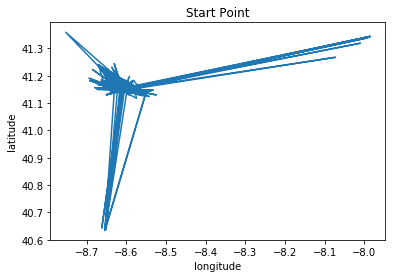

In [12]:
# plt.figure(figsize=(16, 9))
plt.plot(df_20000904["start_x"], df_20000904["start_y"])
plt.title("Start Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

### 降車地点

Text(0,0.5,'latitude')

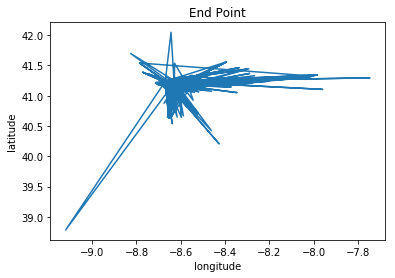

In [13]:
# plt.figure(figsize=(16, 9))
plt.plot(df_20000904["end_x"], df_20000904["end_y"])
plt.title("End Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

In [ ]:
df_20000904[]

## TAXI_ID = 20000904 （乗車回数が最も多い）で考察

In [27]:
# 
# 20000521, 20000585
df_20000403 = df[df["TAXI_ID"] == 20000403]
driving_time.loc[20000403]

4614780.0

乗車時間　4614780。0 は 75%1タイル (3650463.75)よりは長い。   
乗車回数で、乗車時間を稼ぐタイプ

### 乗車地点

Text(0,0.5,'latitude')

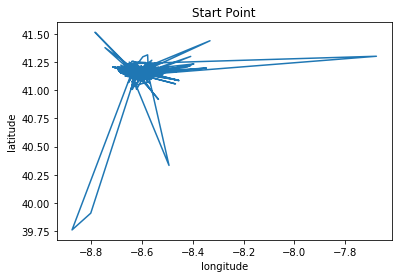

In [28]:
# plt.figure(figsize=(16, 9))
plt.plot(df_20000403["start_x"], df_20000403["start_y"])
plt.title("Start Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

Text(0,0.5,'latitude')

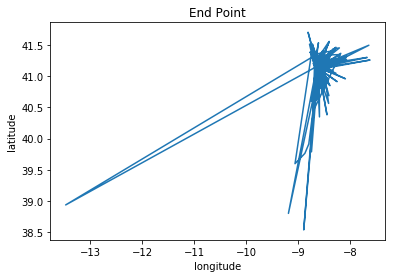

In [29]:
# plt.figure(figsize=(16, 9))
plt.plot(df_20000403["end_x"], df_20000403["end_y"])
plt.title("End Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

## TAXI_ID = 20000521 （新人）で考察

In [34]:
df_20000521 = df[df["TAXI_ID"] == 20000521]
df_20000521.shape, driving_time.loc[20000521]

((1966, 21), 1261005.0)

乗車回数＝1966、乗車時間＝1261005.0　共に25%タイル（2689.75回、2068083.75秒）共に下回る新人の場合

Text(0,0.5,'latitude')

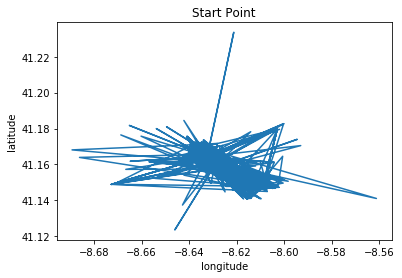

In [35]:
plt.plot(df_20000521["start_x"], df_20000521["start_y"])
plt.title("Start Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

Text(0,0.5,'latitude')

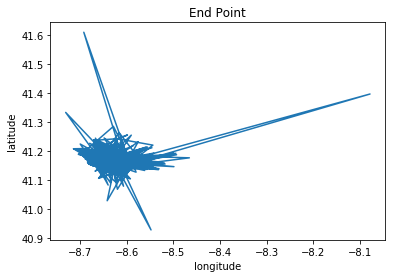

In [36]:
plt.plot(df_20000521["end_x"], df_20000521["end_y"])
plt.title("End Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

## TAXI_ID = 20000440 （中堅）で考察

In [37]:
driving_count.describe()['50%'],driving_time.describe()['50%']

(3702.0, 2766832.5)

In [43]:
driving_count[driving_count.values < 3702].head(3)

TAXI_ID
20000201    3692
20000440    3690
20000549    3685
dtype: int64

In [48]:
df_20000440 = df[df["TAXI_ID"] == 20000440]
df_20000440.shape, driving_time.loc[20000440]

((3690, 21), 2752170.0)

Text(0,0.5,'latitude')

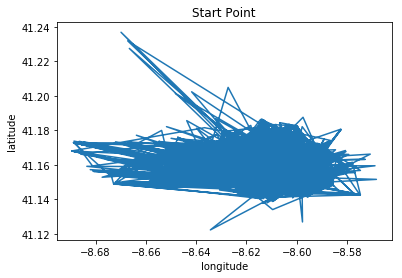

In [49]:
plt.plot(df_20000440["start_x"], df_20000440["start_y"])
plt.title("Start Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

Text(0,0.5,'latitude')

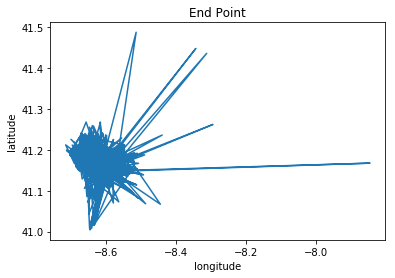

In [50]:
plt.plot(df_20000440["end_x"], df_20000440["end_y"])
plt.title("End Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

## TAXI_ID = 20000380 (中堅）で考察

In [57]:
df_20000380 = df[df["TAXI_ID"] == 20000380]
df_20000380.shape, driving_time.loc[20000380]

((3522, 21), 2484480.0)

Text(0,0.5,'latitude')

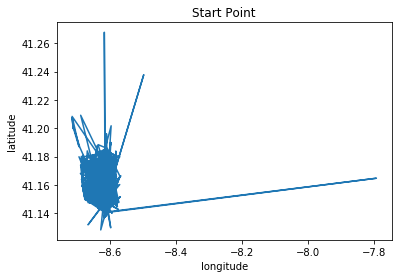

In [58]:
plt.plot(df_20000380["start_x"], df_20000380["start_y"])
plt.title("Start Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

Text(0,0.5,'latitude')

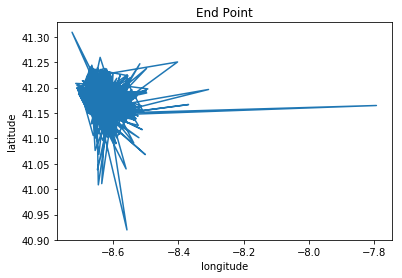

In [59]:
plt.plot(df_20000380["end_x"], df_20000380["end_y"])
plt.title("End Point")
plt.xlabel("longitude")
plt.ylabel("latitude")

## 分析方針

１.全ドライバーの移動距離と乗車時間と乗車回数の合計を算出  
２.乗車時間と乗車回数の２軸でプロット  
３.クラスタリング  
４.  

乗車時間／乗車回数　で優良ドライバーを特定


タクシーの料金は、初乗り運賃の時点から「距離」と「時間」を併用。

タクシーの料金は基本的に一定距離内の初乗り運賃（例：東京：最長1.052kmまで、上限410円）
を越えて乗車した場合の走行距離に応じた「距離制」で計算されるが、走行速度が10km/h以下になった場合には、走行時間を距離に置き換えて計算する「時間距離併用制」が適用される。


## 乗車率の算出

### 乗車率の定義
1日の乗車時間（秒）/ 24 * 60 * 60(秒）    

※日跨ぎで働くドライバーでも1日の稼働時間は同じという前提。   
例）9-18（8h）、22-25(1h）＋ 10-15(5h）＋22-25(2h）　


In [61]:
def calc_working_rate(arr: np.ndarray):
    
    # 24 * 60 * 60 = 86400
    return ( arr.sum() / 86400) * 100

In [62]:
24 * 60 * 60

86400